<a href="https://colab.research.google.com/github/shyamjith94/PyTorch/blob/main/DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
%%capture
!pip install torch torchvision

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

In [106]:
data = pd.read_csv("/content/drive/MyDrive/PyTorch/Data/iris.csv")
data_1 = data 

In [107]:
print(data.head())
data.shape
"""
"target" -->
    0   - Iris setosa
    1   - Iris virginica
    2   - Iris versicolor
"""

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


'\n"target" -->\n    0   - Iris setosa\n    1   - Iris virginica\n    2   - Iris versicolor\n'

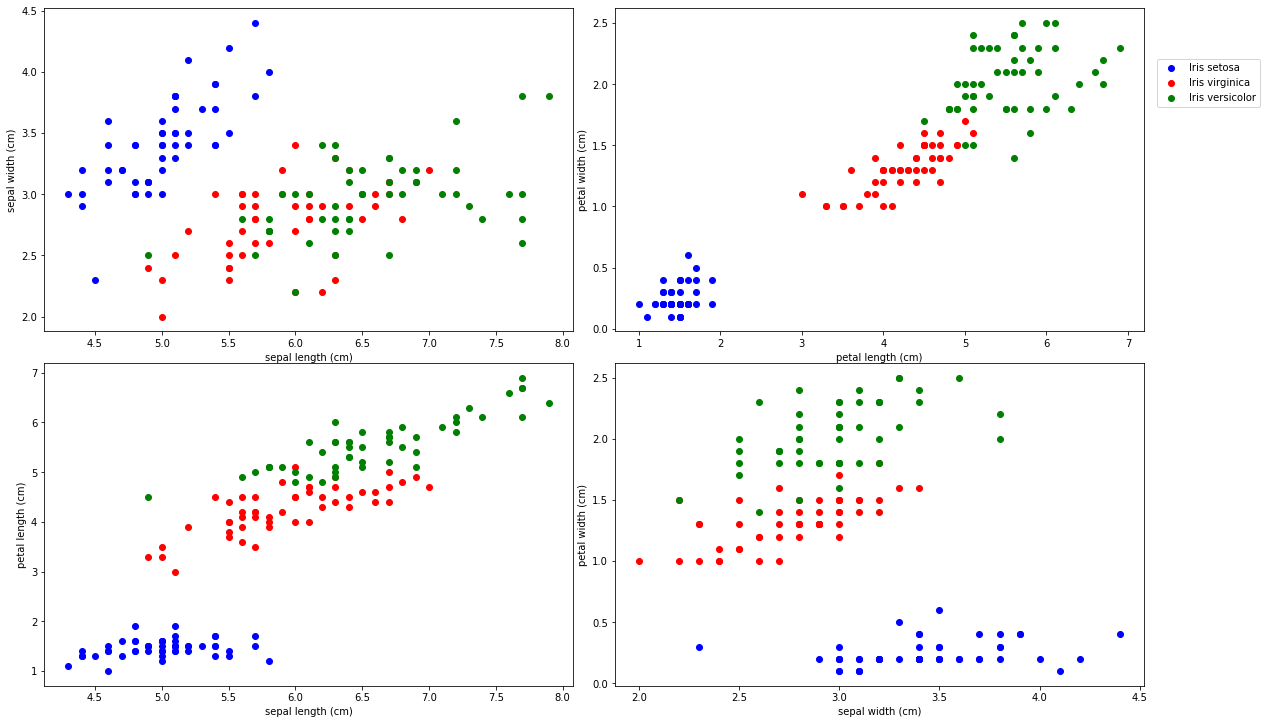

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
fig.tight_layout()


plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']

labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = data.columns[plots[i][0]]
        y = data.columns[plots[i][1]]
        ax.scatter(data[data['target']==j][x], data[data['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

**Train Test Split**

In [109]:
features = data.drop('target', axis=1).values
label = data['target'].values

In [110]:
x_train, x_test, y_train,y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [111]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [112]:
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [113]:
# pytorch build in method
features = data.drop('target', axis=1).values
label = data['target'].values

iris = TensorDataset(torch.FloatTensor(features), torch.LongTensor(label))
for i in iris[:5]:
    print(i)

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])
tensor([0, 0, 0, 0, 0])


In [114]:
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)
for batch, sample_batch in enumerate(iris_loader):
    print(batch, sample_batch[:60])


0 [tensor([[6.3000, 3.3000, 6.0000, 2.5000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [5.0000, 3.0000, 1.6000

**Model Creation**

In [115]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        """
        -How many layers
        -Input layer (4 features ) -> h1 N -> h2 N --> Output(3 classes)
        """
        super().__init__()
        self.full_con_1 = nn.Linear(in_features, h1)
        self.full_con_2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        # activation function
        x = F.relu(self.full_con_1(x))
        x = F.relu(self.full_con_2(x))
        x = self.out(x)
        return x


In [116]:
torch.manual_seed(32)
model = Model()


In [117]:
print(data.head())
data['target_ltr'] = data['target'].replace({0.:'setosa', 1.:'virginica', 2.:'versicolor'})
print(data.head())
data = data.drop('target_ltr', axis=1)


   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]
   sepal length (cm)  sepal width (cm)  ...  target  target_ltr
0                5.1               3.5  ...     0.0      setosa
1                4.9               3.0  ...     0.0      setosa
2                4.7               3.2  ...     0.0      setosa
3                4.6               3.1  ...     0.0      setosa
4                5.0               3.6  ...     0.0      setosa

[5 rows x 6 columns]


In [118]:
x = data.drop('target', axis=1)
y = data['target']

In [119]:
x = x.values
y = y.values

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [121]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [122]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [123]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [124]:
model.parameters

<bound method Module.parameters of Model(
  (full_con_1): Linear(in_features=4, out_features=8, bias=True)
  (full_con_2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [125]:
epochs = 200
losses = []
for i in range(epochs):
    # run forward get pred
    y_pred = model.forward(x_train)
    # calculate loss
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    if i%10==0:
        print(f"Epochs {i} and loss {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs 0 and loss 1.1507115364074707
Epochs 10 and loss 0.9377315044403076
Epochs 20 and loss 0.779825747013092
Epochs 30 and loss 0.6099401116371155
Epochs 40 and loss 0.40079930424690247
Epochs 50 and loss 0.25436317920684814
Epochs 60 and loss 0.15053054690361023
Epochs 70 and loss 0.10086944699287415
Epochs 80 and loss 0.08128310739994049
Epochs 90 and loss 0.07231426984071732
Epochs 100 and loss 0.06713331490755081
Epochs 110 and loss 0.06355972588062286
Epochs 120 and loss 0.060853783041238785
Epochs 130 and loss 0.05870983749628067
Epochs 140 and loss 0.056958481669425964
Epochs 150 and loss 0.05549229681491852
Epochs 160 and loss 0.05423792451620102
Epochs 170 and loss 0.05314468964934349
Epochs 180 and loss 0.0521775558590889
Epochs 190 and loss 0.05131225660443306


Text(0.5, 0, 'Losses')

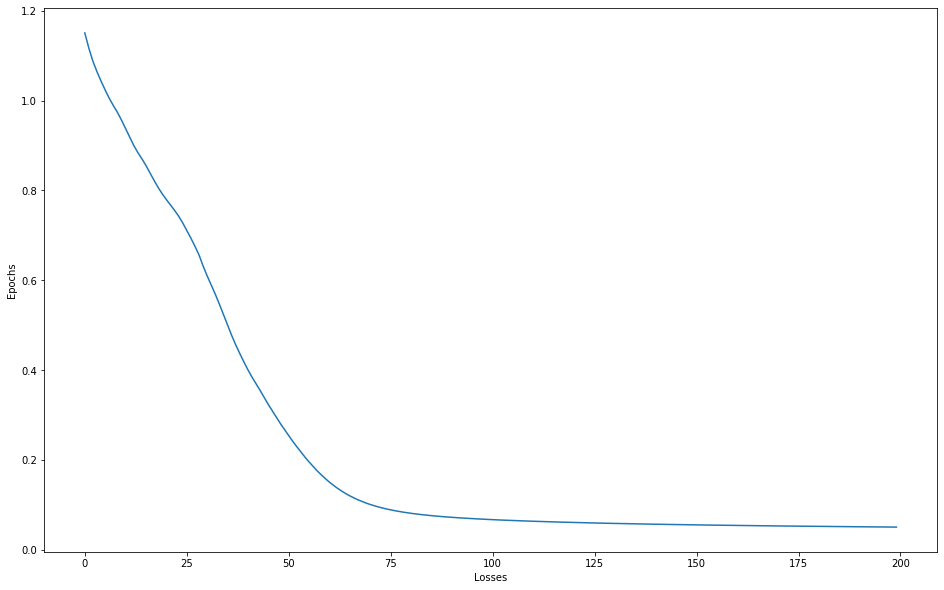

In [126]:
plt.figure(figsize=(16,10))
plt.plot(range(epochs), losses)
plt.ylabel('Epochs')
plt.xlabel('Losses')

**Evaluation**

In [127]:
# no_grad no need to change param , auto gradient deactivate
with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test)
print('loss', loss)

loss tensor(0.0440)


In [128]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_eval = model.forward(data)
        print(f'{i+1}.) {str(y_eval)} \t true class {y_eval.argmax().item()} \t Y test {y_test[i]}')

        if y_eval.argmax().item() == y_test[i]:
            correct +=1
print('we got correct', correct) 

1.) tensor([-2.8205,  6.4803, -1.0145]) 	 true class 1 	 Y test 1
2.) tensor([-2.4630,  7.1412, -1.8081]) 	 true class 1 	 Y test 1
3.) tensor([  7.9814,   1.1886, -12.2241]) 	 true class 0 	 Y test 0
4.) tensor([-4.8562,  6.3026,  1.3067]) 	 true class 1 	 Y test 1
5.) tensor([-9.3934,  4.2225,  7.4338]) 	 true class 2 	 Y test 2
6.) tensor([-13.4211,   1.8034,  12.8416]) 	 true class 2 	 Y test 2
7.) tensor([  7.8054,   1.4258, -12.1862]) 	 true class 0 	 Y test 0
8.) tensor([  8.7649,   1.0591, -13.1944]) 	 true class 0 	 Y test 0
9.) tensor([-9.3691,  4.2262,  7.3250]) 	 true class 2 	 Y test 2
10.) tensor([-12.0320,   3.1541,  10.7873]) 	 true class 2 	 Y test 2
11.) tensor([-12.5736,   2.8315,  11.5023]) 	 true class 2 	 Y test 2
12.) tensor([  7.9732,   0.9370, -11.9811]) 	 true class 0 	 Y test 0
13.) tensor([-11.9959,   2.5438,  11.0148]) 	 true class 2 	 Y test 2
14.) tensor([-4.8925,  6.0516,  1.4775]) 	 true class 1 	 Y test 1
15.) tensor([-9.9068,  3.9488,  8.0440]) 	 true

**Save Model**


In [129]:
#  if its pickle file 
#  torch.save(model, filepath), save model class also
torch.save(model.state_dict(), '/content/drive/MyDrive/PyTorch/SaveModel/MyIrisModel.pt')

**Load Save Model**<br>
    we need original model class for loading model

In [130]:
new_model  = Model()
new_model.load_state_dict(torch.load('/content/drive/MyDrive/PyTorch/SaveModel/MyIrisModel.pt'))

<All keys matched successfully>

In [131]:
new_model.eval()

Model(
  (full_con_1): Linear(in_features=4, out_features=8, bias=True)
  (full_con_2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

**Check unseen data**

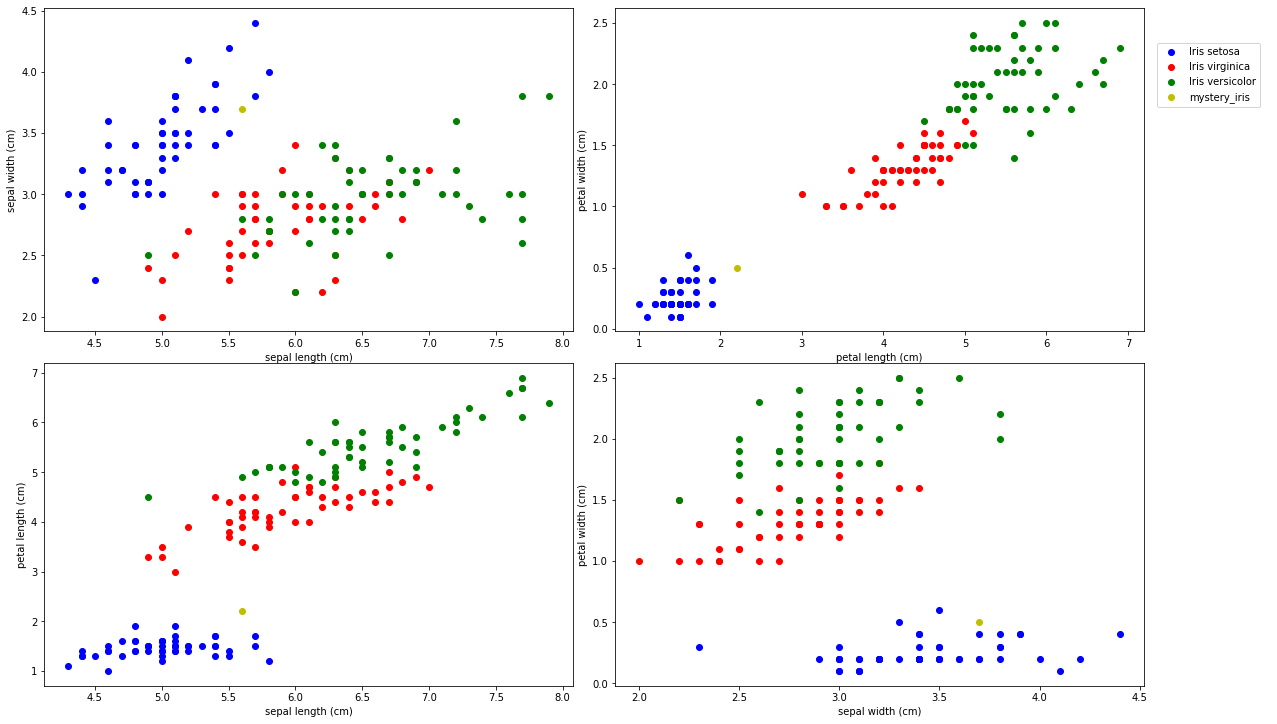

In [134]:
# unseen data point
mystery_iris = torch.tensor([5.6, 3.7, 2.2,0.5])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
fig.tight_layout()


plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']

labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor', 'mystery_iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = data_1.columns[plots[i][0]]
        y = data_1.columns[plots[i][1]]
        ax.scatter(data_1[data_1['target']==j][x], data_1[data_1['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # plot unseen data point
    ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [136]:
# no_grad no need to change param , auto gradient deactivate
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  7.1706,   2.2643, -11.8109])
tensor(0)
